### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

### Loading Preprocessed Data

In [ ]:
df_preprocessed = pd.read_csv('../data/processed_heart_disease.csv')

X = df_preprocessed.drop('target', axis=1)
y = df_preprocessed['target']


print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print("\nFirst few rows of features (X):")
print(X.head())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features scaled for clustering.")

print(X_scaled)

X_for_clustering = X_Scaled
print("Using preprocessed features for clustering")

Features (X) shape: (920, 13)
Target (y) shape: (920,)

First few rows of features (X):
    age  sex  cp  trestbps   chol  ...  exang  oldpeak  slope   ca  thal
0  63.0    1   1     145.0  233.0  ...    0.0      2.3    3.0  0.0   6.0
1  67.0    1   4     160.0  286.0  ...    1.0      1.5    2.0  3.0   3.0
2  67.0    1   4     120.0  229.0  ...    1.0      2.6    2.0  2.0   7.0
3  37.0    1   3     130.0  250.0  ...    0.0      3.5    3.0  0.0   3.0
4  41.0    0   2     130.0  204.0  ...    0.0      1.4    1.0  0.0   3.0

[5 rows x 13 columns]
Features scaled for clustering.
[[ 1.00738556  0.51693097 -2.4181517  ...  2.23408054 -0.36139973
   1.2001863 ]
 [ 1.43203377  0.51693097  0.80605057 ...  0.29506724  4.41115177
  -0.58649881]
 [ 1.43203377  0.51693097  0.80605057 ...  0.29506724  2.82030127
   1.795748  ]
 ...
 [ 0.15808914  0.51693097  0.80605057 ...  0.29506724 -0.36139973
   1.2001863 ]
 [ 0.4765753   0.51693097  0.80605057 ...  0.29506724 -0.36139973
  -0.58649881]
 [ 0.9012

### Applying K-Means Clustering:


--- K-Means Clustering ---


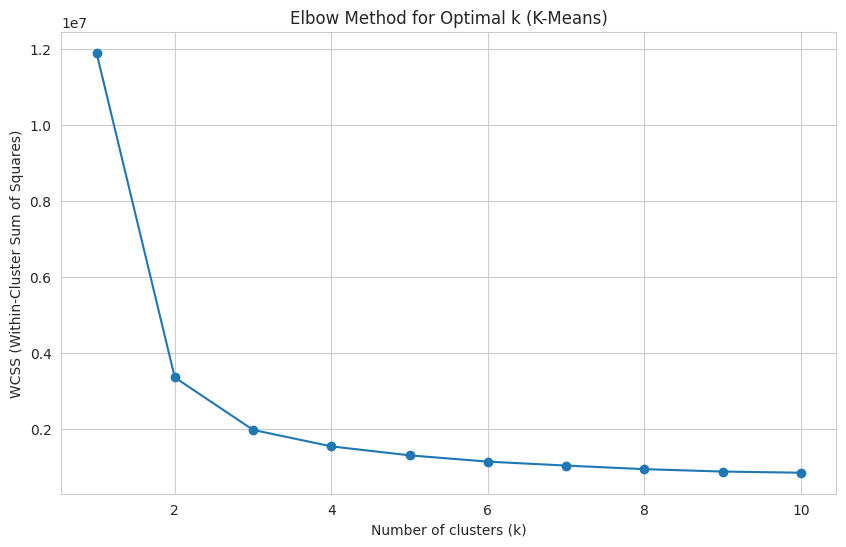


Chosen number of clusters for K-Means: 3

K-Means clustering completed.
Cluster labels assigned (0 to 1).

First few rows with K-Means cluster labels:
   kmeans_cluster  target
0               2       0
1               0       1
2               2       1
3               2       0
4               2       0
5               2       0
6               0       1
7               0       0
8               2       1
9               2       1

Average Silhouette Score for K-Means (k=2): 0.475


In [6]:
print("\n--- K-Means Clustering ---")
k_range = range(1, 11)
wcss = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_for_clustering)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.title("Elbow Method for Optimal k (K-Means)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()

chosen_k_kmeans = 3
print(f"\nChosen number of clusters for K-Means: {chosen_k_kmeans}")

kmeans_final = KMeans(n_clusters=chosen_k_kmeans, init='k-means++', random_state=42)
cluster_labels_kmeans = kmeans_final.fit_predict(X_for_clustering)

df_preprocessed['kmeans_cluster'] = cluster_labels_kmeans

print("\nK-Means clustering completed.")
print(f"Cluster labels assigned (0 to {chosen_k_means - 1}).")
print("\nFirst few rows with K-Means cluster labels:")
print(df_preprocessed[['kmeans_cluster', 'target']].head(10))

if chosen_k_means > 1:
    silhouette_avg_kmeans = silhouette_score(X_for_clustering, cluster_labels_kmeans)
    print(f"\nAverage Silhouette Score for K-Means (k={chosen_k_means}): {silhouette_avg_kmeans:.3f}")

### Applying Hierarchical Clustering:


--- Hierarchical Clustering ---


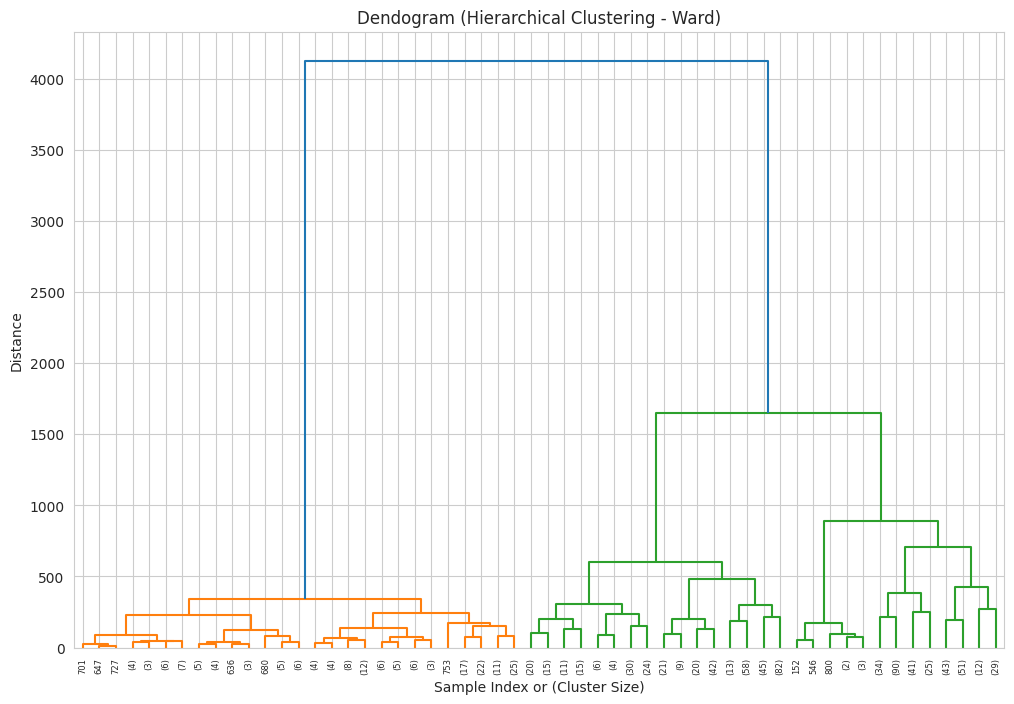


Chosen number of clusters for Hierarchical Clustering: 3

Hierarchical clustering completed.
Cluster labels assigned (0 to 2).

First few rows with Hierarchical cluster labels:
   hier_cluster  target
0             0       0
1             0       1
2             2       1
3             2       0
4             2       0
5             2       0
6             0       1
7             0       0
8             0       1
9             2       1

Average Silhouette Score for Hierarchical Clustering (k=3): 0.445


In [7]:
print("\n--- Hierarchical Clustering ---")

linkage_matrix = linkage(X_for_clustering, method="ward")

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)

plt.title('Dendogram (Hierarchical Clustering - Ward)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel("Distance")
plt.show()

chosen_k_hier = chosen_k_kmeans
print(f"\nChosen number of clusters for Hierarchical Clustering: {chosen_k_hier}")

hier_clustering = AgglomerativeClustering(n_clusters=chosen_k_hier, linkage='ward')
cluster_labels_hier = hier_clustering.fit_predict(X_for_clustering)

df_preprocessed['hier_cluster'] = cluster_labels_hier

print("\nHierarchical clustering completed.")
print(f"Cluster labels assigned (0 to {chosen_k_hier - 1}).")
print("\nFirst few rows with Hierarchical cluster labels:")
print(df_preprocessed[['hier_cluster', 'target']].head(10))

if chosen_k_hier > 1:
    silhouette_avg_hier = silhouette_score(X_for_clustering, cluster_labels_hier)
    print(f"\nAverage Silhouette Score for Hierarchical Clustering (k={chosen_k_hier}): {silhouette_avg_hier:.3f}")

### Comparing Clusters with Actual Labels:


--- Comparing Clusters with True Labels ---

Adjusted Rand Index (ARI) between K-Means clusters and true labels: 0.042
Adjusted Rand Index (ARI) between Hierarchical clusters and true labels: 0.043

--- K-Means Cluster vs True Target ---
target            0    1  All
kmeans_cluster               
0               112  143  255
1                22  153  175
2               277  213  490
All             411  509  920

--- Hierarchical Cluster vs True Target ---
target          0    1  All
hier_cluster               
0             152  181  333
1              20  152  172
2             239  176  415
All           411  509  920

--- Visualizing Clusters using PCA (2D) ---


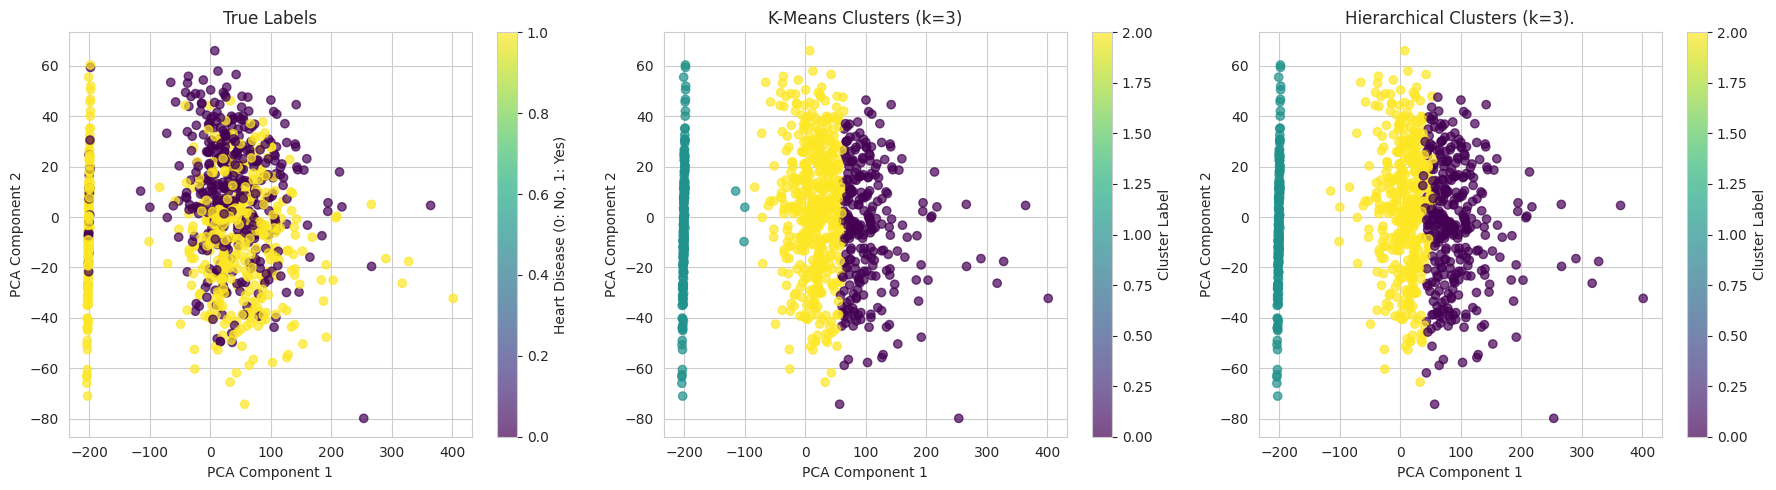


--- Summary of Unsupervised Learning ---
K-Means (k=3): Silhouette Score = 0.47549019620468147, ARI = 0.042
Hierarchical (k=3): Silhouette Score = 0.44462373213906353, ARI= 0.043


In [14]:
print("\n--- Comparing Clusters with True Labels ---")

ari_kmeans = adjusted_rand_score(y, cluster_labels_kmeans)
ari_hier = adjusted_rand_score(y, cluster_labels_hier)

print(f"\nAdjusted Rand Index (ARI) between K-Means clusters and true labels: {ari_kmeans:.3f}")
print(f"Adjusted Rand Index (ARI) between Hierarchical clusters and true labels: {ari_hier:.3f}")

print("\n--- K-Means Cluster vs True Target ---")
crosstab_kmeans = pd.crosstab(df_preprocessed['kmeans_cluster'], df_preprocessed['target'], margins=True)
print(crosstab_kmeans)

print("\n--- Hierarchical Cluster vs True Target ---")
crosstab_hier = pd.crosstab(df_preprocessed['hier_cluster'], df_preprocessed['target'], margins=True)
print(crosstab_hier)

if X.shape[1] > 2:
    print("\n--- Visualizing Clusters using PCA (2D) ---")
    pca_vis = PCA(n_components=2, random_state=42)
    X_pca_vis = pca_vis.fit_transform(X_for_clustering)
    
    fig, axes = plt.subplots(1,3, figsize=(18, 5))
    
    
    scatter1 = axes[0].scatter(X_pca_vis[:, 0], X_pca_vis[:, 1], c=y, cmap='viridis', alpha=0.7)
    axes[0].set_title('True Labels')
    axes[0].set_xlabel('PCA Component 1')
    axes[0].set_ylabel('PCA Component 2')
    plt.colorbar(scatter1, ax=axes[0], label='Heart Disease (0: No, 1: Yes)')
    
    
    scatter2 = axes[1].scatter(X_pca_vis[:, 0], X_pca_vis[:, 1], c=cluster_labels_kmeans, cmap="viridis", alpha=0.7)
    axes[1].set_title(f"K-Means Clusters (k={chosen_k_kmeans})")
    axes[1].set_xlabel('PCA Component 1')
    axes[1].set_ylabel('PCA Component 2')
    plt.colorbar(scatter2, ax=axes[1], label="Cluster Label")
    
    scatter3 = axes[2].scatter(X_pca_vis[: , 0], X_pca_vis[:, 1], c=cluster_labels_hier, cmap="viridis", alpha=0.7)
    axes[2].set_title(f"Hierarchical Clusters (k={chosen_k_hier}).")
    axes[2].set_xlabel('PCA Component 1')
    axes[2].set_ylabel('PCA Component 2')
    plt.colorbar(scatter3, ax=axes[2], label="Cluster Label")
    plt.tight_layout()
    plt.show()
else:
    print("\nData has 2 or fewer features, skipping PCA visualization.")
    

print("\n--- Summary of Unsupervised Learning ---")
print(f"K-Means (k={chosen_k_kmeans}): Silhouette Score = {silhouette_avg_kmeans }, ARI = {ari_kmeans:.3f}")
print(f"Hierarchical (k={chosen_k_hier}): Silhouette Score = {silhouette_avg_hier}, ARI= {ari_hier:.3f}")